In [49]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPooling1D, Conv1D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

# Import libraries and modules
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

In [51]:
df = pd.read_csv('fashion-mnist_train.csv')

X = df.drop(columns = ["label"])
y = df["label"]
X.head()

X = X.to_numpy().astype("float32")/255

X = X.reshape(X.shape[0], 28, 28, 1)

y= utils.to_categorical(y, 10)



#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify=y)
#check dimension
#X_test.shape, y_test.shape

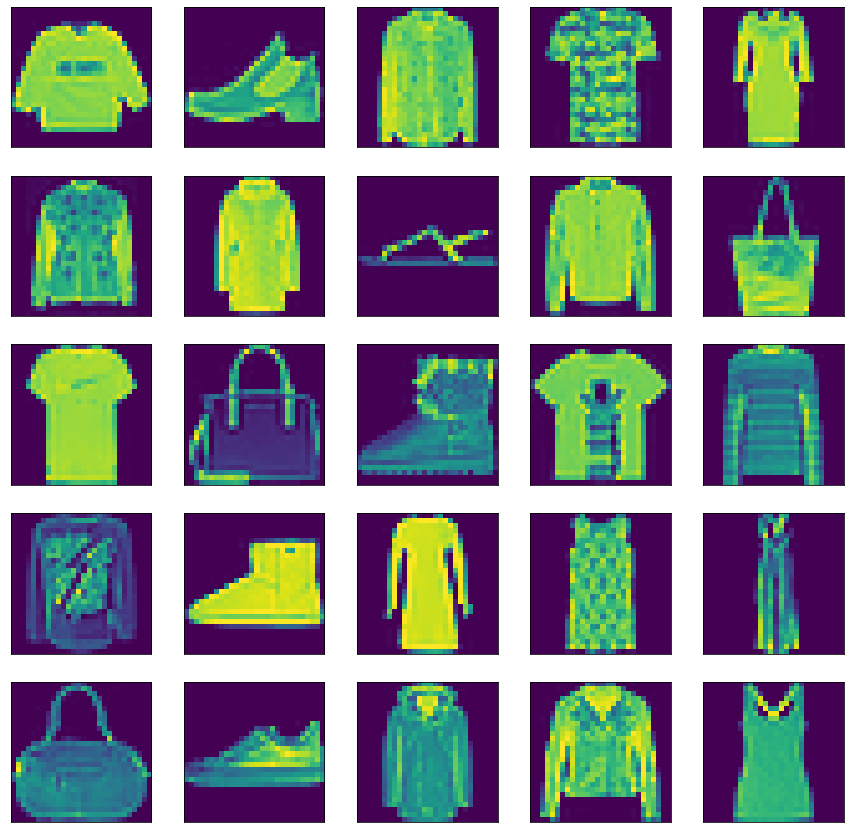

In [32]:
axes_x = df.iloc[:,1:]
axes_y = df.iloc[:,0] 
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]) # this not to show pixels on axes
    plt.yticks([]) # this not to show pixels on axes
    plt.grid(False)
    plt.imshow(axes_x.loc[i].values.reshape((28,28)))
plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = utils.to_categorical(encoded_y)

In [35]:
#X_train.head(1).shape

In [60]:
# Change y_train.



In [61]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
import tensorflow as tf


In [63]:
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [72]:
model = Sequential()
model.add(Conv2D(filters = 6,       #number of filters to use
              kernel_size = (3, 3),   #dimensions of the filters
              activation = 'relu',    #activation function
              input_shape = (28, 28, 1)))  #shape of image


 # dimensions of region of pooling

model.add(MaxPooling2D(pool_size = (2, 2)))   #filter dimensions

model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

#model = Sequential()
model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2)) # refers to nodes in the first hidden layer
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax', kernel_regularizer=l2(0.001)))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=256,  # 60000/256 = 235 weight updates per epoch
                    epochs=60,
                    verbose=1, 
                    callbacks=[early_stop])

Epoch 1/60
200/200 [==============================] - 4s 19ms/step - loss: 1.7104 - accuracy: 0.4631 - val_loss: 0.7556 - val_accuracy: 0.7723
Epoch 2/60
200/200 [==============================] - 4s 19ms/step - loss: 0.8228 - accuracy: 0.7541 - val_loss: 0.6416 - val_accuracy: 0.8046
Epoch 3/60
200/200 [==============================] - 4s 19ms/step - loss: 0.6929 - accuracy: 0.7938 - val_loss: 0.6039 - val_accuracy: 0.8219
Epoch 4/60
200/200 [==============================] - 4s 18ms/step - loss: 0.6426 - accuracy: 0.8117 - val_loss: 0.5500 - val_accuracy: 0.8420
Epoch 5/60
200/200 [==============================] - 4s 19ms/step - loss: 0.5898 - accuracy: 0.8295 - val_loss: 0.5413 - val_accuracy: 0.8421
Epoch 6/60
200/200 [==============================] - 4s 19ms/step - loss: 0.5534 - accuracy: 0.8412 - val_loss: 0.4952 - val_accuracy: 0.8590
Epoch 7/60
200/200 [==============================] - 4s 19ms/step - loss: 0.5382 - accuracy: 0.8449 - val_loss: 0.4830 - val_accuracy: 0.8599

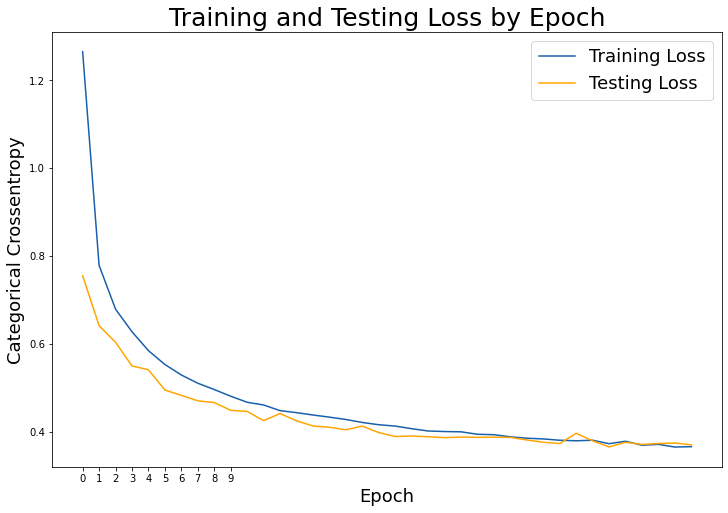

In [67]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))
plt.legend(fontsize = 18);

In [99]:
preds = model.predict(X_test)

In [85]:
Z_train, Z_test, z_train, z_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify=y)

In [ ]:
tf.math.confusion_matrix(
    #labels, 
    predictions, 
    #num_classes=None, 
    #weights=None, 
    #dtype=tf.dtypes.int32,
    #name=None
)

In [97]:
predictions = np.argmax(model.predict(X_test), axis=-1)
prediction = np.argmax(utils.to_categorical(predictions), axis = 1)
#prediction = encoder.inverse_transform(prediction)
correct = len([i for i, j in zip(prediction, y_test) if i == j])
perc_correct = round(len([i for i, j in zip(prediction, y_test) if i == j])*100/len(z_test), 2)
perc_correct

NameError: name 'encoder' is not defined

In [90]:
prediction

array([175, 239, 223, ...,  47,  47, 255])

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1)) # refers to nodes in the first hidden layer
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax', kernel_regularizer=l2(0.001)))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=256,  # 60000/256 = 235 weight updates per epoch
                    epochs=60,
                    verbose=1, 
                    callbacks=[early_stop])

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))
plt.legend(fontsize = 18);

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds

In [ ]:
preds = np.round(preds, 0)
preds = preds.astype(int)
preds

In [ ]:
preds = model.predict(X_test)
preds

In [ ]:
preds

In [ ]:
model.history['loss'][-1], model.history['val_loss'][-1]